In [27]:
import numpy as np
file = open(r"E:\RYJ\RYJ\third_paper\data\temp\new_155.den", 'r')
vector1 = np.array([float(_.strip()) for _ in file.readlines()])
file.close()
file = open(r"E:\RYJ\RYJ\third_paper\data\one\res\res_smooth", 'r')
vector2 = np.array([float(_.strip()) for _ in file.readlines()])
file.close()
u = np.linalg.norm(vector1 - vector2)

12.543763768893701

In [39]:
import math
math.floor(np.min(vector2[vector2 > 0]) * 10) / 10
# math.ceil(np.max(vector2[vector2 > 0]) * 10) / 10

1.6

In [29]:
f = open(r"E:\RYJ\RYJ\third_paper\data\temp\new_155.den", 'r')
s_dens = [float(_.strip()) for _ in f.readlines()]
f.close()
box_js = []
for j, s_den in enumerate(s_dens):
    if (s_den != 0) and (s_den != 2.65):
        box_js.append(str(j + 1))
f = open(r"E:\RYJ\RYJ\third_paper\data\temp\box_js.txt", 'w')
f.write('\n'.join(box_js))
f.close()

In [60]:
thread = 0.15
file = open(r"E:\RYJ\RYJ\third_paper\data\temp\new_155.den", 'r')
theory_dens = [float(_.strip()) for _ in file.readlines()]
file.close()
file = open(r"E:\RYJ\RYJ\third_paper\data\one\res\res_smooth", 'r')
res_dens = [float(_.strip()) for _ in file.readlines()]
file.close()
file = open(r"E:\RYJ\RYJ\third_paper\data\temp\box_js.txt", 'r')
box_js = [float(_.strip()) for _ in file.readlines()]
file.close()

thread = 2.15
tn = 0 # 实际正常，识别正常
fa = 0 # 实际正常，识别出为异常
fn = 0 # 实际异常， 识别出来为正常
ta = 0 # 实际异常，识别出为异常
all_n = 0
for i, (the_den, res_den) in enumerate(zip(theory_dens, res_dens)):
    if the_den == 0:
        continue
    all_n += 1
    if i + 1 in box_js:  # 异常区，实际上为异常
        if res_dens[i] > thread: # 识别出来为正常
            fn += 1
        else:
            ta += 1
    else:  # 实际上是正常
        if res_dens[i] > thread: # 识别出来为正常
            tn += 1
        else:
            fa += 1 
acc = (ta + tn) / all_n  # 正确判断异常、正常的比例
pre = ta / (ta +fa)  # 识别出是异常的里面真正是异常的比例
rec = ta / (ta + fn)  # 别识别出是异常的体素实际上就是异常的比例
acc, pre, rec

(0.9982083333333334, 0.8616504854368932, 0.9244791666666666)

In [62]:
count_TP=0#TP  # 
count_FN=0#FN
count_TN=0#TN
count_FP=0#FP
# n = 0
for j in range(len(theory_dens)):
    if theory_dens[j] not in [0, 2.65]:  # 实际上是异常
        # 这里是以1.6为基准，在他附近视为异常
        if abs(theory_dens[j]-res_dens[j])<=0.3:  # 识别出为异常。 正确识别出的异常区域
            count_TP+=1
        else:
            count_FN+=1   # 实际上是异常，识别出是异常。但是根据1.6基准没有看出来是不是异常
    else:  # 实际上是正常
        # 这里是以2.65为基准，在他附近视为正常
        # 假如附近为0.1.那么1.75在box内就会被视为正常，但是在box外就会被当做异常
        if abs(theory_dens[j]-res_dens[j])<=0.3:  # 识别出为正常。实际上是正常，识别出也是
            count_TN+=1
        else:
            count_FP+=1  # 实际上是正常，但是识别出来是异常
(count_TP + count_TN) / len(theory_dens)

0.995796130952381

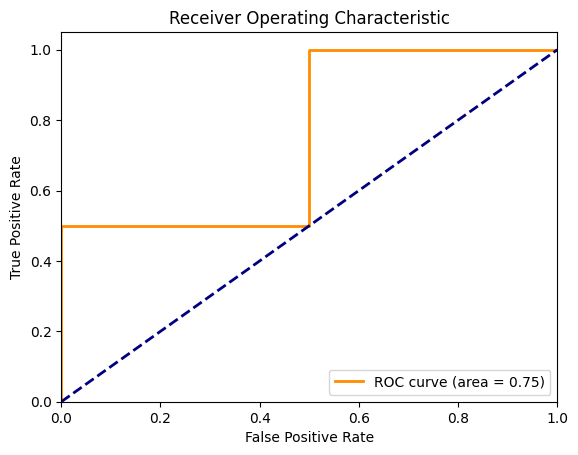

In [63]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 示例数据: 假设我们有真实标签和预测概率
y_true = np.array([0, 0, 1, 1])  # 实际标签
y_scores = np.array([0.1, 0.4, 0.35, 0.8])  # 预测概率

# 计算 ROC 曲线的值
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 计算 AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 绘制对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [66]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
print(sys.path)
import math

['e:\\Muon_Imaging_Algorithm\\InvSysTools\\MyTools', 'C:\\root_v6.32.02\\bin', 'd:\\anaconda\\envs\\miu\\python38.zip', 'd:\\anaconda\\envs\\miu\\DLLs', 'd:\\anaconda\\envs\\miu\\lib', 'd:\\anaconda\\envs\\miu', '', 'd:\\anaconda\\envs\\miu\\lib\\site-packages', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\Pythonwin', 'e:\\Muon_Imaging_Algorithm\\InvSysTools', 'e:\\Muon_Imaging_Algorithm\\InvSysTools', 'e:\\Muon_Imaging_Algorithm\\InvSysTools']


In [65]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
print(sys.path)
import math

from InvDataTools.MeshTools import MeshTools
import matplotlib.pyplot as plt
import matplotlib
# import scienceplots
def res_diff_Analysis(res_file,moudle_file,refs2_file,mesh_file):
    ignore=0.15

    res_data=open(res_file,'r').readlines()
    res_data1=open(refs2_file,'r').readlines()
    moudle_data=open(moudle_file,'r').readlines()
    middle=[]
    for i in res_data:
        middle.append(float(i))
    res_data=middle
    middle=[]
    for i in res_data1:
        middle.append(float(i))
    res_data1=middle
    middle=[]
    for i in moudle_data:
        middle.append(float(i))
    moudle_data=middle

    mesh=MeshTools(mesh_file)
    shape=mesh.get_shape()
    from InvDataTools.Jxyz_Tools import getj_from_xyz
    x_cells_sum=[]
    x_cells_sum1=[]
    x_cells_sum2=[]
    for x in range(shape[0]):
        middle=0
        middle1=0
        middle2=0
        for z in range(shape[2]):
            for y in range(shape[1]):
                j=getj_from_xyz(shape,(x+1,y+1,z+1))-1
                middle += res_data[j] if abs(res_data[j]-2.65)>ignore else 2.65
                middle1+=moudle_data[j] if abs(moudle_data[j]-2.65)>ignore else 2.65
                middle2 += res_data1[j] if abs(res_data1[j]-2.65)>ignore else 2.65
        if x not in [0,1,2,3,shape[0]-1,shape[0]-2,shape[0]-3,shape[0]-4]:
            x_cells_sum.append(middle/((shape[2]-6)*(shape[1]-6)))
            x_cells_sum1.append(middle1/((shape[2]-6)*(shape[1]-6)))
            x_cells_sum2.append(middle2/((shape[2]-6)*(shape[1]-6)))
    print(Cov_array(x_cells_sum,x_cells_sum1))
    y_cells_sum = []
    y_cells_sum1 = []
    y_cells_sum2 = []
    for y in range(shape[1]):
        middle = 0
        middle1 = 0
        middle2=0
        for z in range(shape[2]):
            for x in range(shape[0]):
                j = getj_from_xyz(shape, (x + 1, y + 1, z + 1)) - 1
                middle += res_data[j] if abs(res_data[j]-2.65)>ignore else 2.65
                middle1 += moudle_data[j]
                middle2 += res_data1[j] if abs(res_data1[j]-2.65)>ignore else 2.65
        if y not in [0, 1,2,3, shape[1] - 1, shape[1] - 2,shape[1] - 3,shape[1] - 4]:
            y_cells_sum.append(middle / ((shape[2] - 6) * (shape[0] - 6)))
            y_cells_sum1.append(middle1 / ((shape[2] - 6) * (shape[0] - 6)))
            y_cells_sum2.append(middle2 / ((shape[2] - 6) * (shape[0] - 6)))
    print(Cov_array(y_cells_sum, y_cells_sum1))
    z_cells_sum = []
    z_cells_sum1 = []
    z_cells_sum2 = []
    for z in range(shape[2]):
        middle = 0
        middle1 = 0
        middle2 = 0
        for y in range(shape[1]):
            for x in range(shape[0]):
                j = getj_from_xyz(shape, (x + 1, y + 1, z + 1)) - 1
                middle += res_data[j] if abs(res_data[j]-2.65)>(ignore) else 2.65
                middle1 += moudle_data[j]
                middle2 += res_data1[j] if abs(res_data1[j]-2.65)>(ignore) else 2.65
        if z not in [0, 1,2,3, shape[2] - 1, shape[2] - 2,shape[2]-3,shape[2]-4]:
            z_cells_sum.append(middle / ((shape[1] - 6) * (shape[0] - 6)))
            z_cells_sum1.append(middle1 / ((shape[1] - 6) * (shape[0] - 6)))
            z_cells_sum2.append(middle2 / ((shape[1] - 6) * (shape[0] - 6)))
    print(Cov_array(z_cells_sum, z_cells_sum1))


    #计算理论模型的

    plt.style.use(['science','ieee', 'no-latex'])
    matplotlib.rc("font", family='FangSong')  # 使用代码帮助matplotlib识别中文字体仿宋
    plt.rcParams['savefig.dpi'] = 500  # 图片像素
    # plt.rcParams['figure.dpi'] = 150  # 分辨率
    plt.rcParams['figure.figsize']=(2.9, 1.6)
    ymin=2.4
    ymax=2.68
    fig, ax = plt.subplots()
    # ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.plot([i for i in range(len(x_cells_sum))],x_cells_sum ,label="预测模型")
    ax.plot([i for i in range(len(x_cells_sum1))],x_cells_sum1,label="理论模型")
    # ax.plot([i for i in range(len(x_cells_sum2))],x_cells_sum2 ,label="预测模型_LBFGS")

    # ax.plot([0,len(x_cells_sum)-1],[2.65,2.65],c='y',label="参考模型")
    ax.legend(
        # bbox_to_anchor=(1, 1),  # 图例边界框起始位置
               loc="lower left",  # 图例的位置
               ncol=1,  # 列数
               mode="None",  # 当值设置为“expend”时，图例会水平扩展至整个坐标轴区域
               borderaxespad=0,  # 坐标轴和图例边界之间的间距
            #    title="模型",  # 图例标题
               shadow=False,  # 是否为线框添加阴影
               fancybox=True)  # 线框圆角处理参数
    # ax.grid()
    ax.set_xlim(left=0)
    # ax.set_ylim(bottom=2.4,top=2.7)
    # 设置图表标题并给坐标轴加上标签。
    # ax.set_title("预测模型、理论模型、参考模型x方向的切片密度对比", fontsize=14)
    ax.set_xlabel("东西方向的切片编号")
    ax.set_ylabel("平均密度(x10$^3$kg/m$^3$)")#平均密度
    # 设置刻度标记的大小
    ax.tick_params(axis='both')

    fig, ax = plt.subplots()
    # ax.set_ylim(ymin=ymin,ymax=ymax)

    ax.plot([i for i in range(len(y_cells_sum))], y_cells_sum, label="预测模型")
    ax.plot([i for i in range(len(y_cells_sum1))], y_cells_sum1,label="理论模型")
    # ax.plot([i for i in range(len(y_cells_sum))], y_cells_sum, linewidth=1, c='r',label="结合使用分块坐标下降法")
    # ax.plot([0, len(y_cells_sum)-1], [2.65, 2.65], c='y',label="参考模型")
    ax.legend(
        # bbox_to_anchor=(1, 1),  # 图例边界框起始位置
              loc="lower left",  # 图例的位置
              ncol=1,  # 列数
              mode="None",  # 当值设置为“expend”时，图例会水平扩展至整个坐标轴区域
              borderaxespad=0,  # 坐标轴和图例边界之间的间距
            #   title="模型",  # 图例标题
              shadow=False,  # 是否为线框添加阴影
              fancybox=True)  # 线框圆角处理参数
    # ax.grid()
    ax.set_xlim(left=0)
    # ax.set_ylim(bottom=2.55, top=2.7)
    # 设置图表标题并给坐标轴加上标签。
    # ax.set_title("预测模型、理论模型、参考模型y方向的切片密度对比", fontsize=14)
    ax.set_xlabel("南北方向的切片编号")
    ax.set_ylabel("平均密度(x10$^3$kg/m$^3$)")
    # ax.set_ylabel("g/cm$^3$", fontsize=14)#平均密度
    # 设置刻度标记的大小
    ax.tick_params(axis='both')

    fig, ax = plt.subplots()
    # ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.plot([i for i in range(len(z_cells_sum))], z_cells_sum,label="预测模型")
    ax.plot([i for i in range(len(z_cells_sum1))], z_cells_sum1,label="理论模型")
    # ax.plot([i for i in range(len(z_cells_sum2))], z_cells_sum2, linewidth=1, c='b',label="预测模型_LBFGS")
    # ax.plot([0, len(z_cells_sum)-1], [2.65, 2.65], c='y',label="参考模型")
    ax.legend(bbox_to_anchor=(1, 1),  # 图例边界框起始位置
              loc="lower right",  # 图例的位置
              ncol=1,  # 列数
              mode="None",  # 当值设置为“expend”时，图例会水平扩展至整个坐标轴区域
              borderaxespad=0,  # 坐标轴和图例边界之间的间距
            #   title="模型",  # 图例标题
              shadow=False,  # 是否为线框添加阴影
              fancybox=True)  # 线框圆角处理参数
    # ax.grid()
    ax.set_xlim(left=0)
    # ax.set_ylim(bottom=2.55, top=2.7)
    # 设置图表标题并给坐标轴加上标签。
    # ax.set_title("预测模型、理论模型、参考模型z方向的切片密度对比", fontsize=14)
    ax.set_xlabel("垂直方向的切片编号")
    ax.set_ylabel("平均密度(x10$^3$kg/m$^3$)")
    # ax.set_ylabel("x10$^3$kg/m$^3$", fontsize=14)#平均密度
    # 设置刻度标记的大小
    ax.tick_params(axis='both')

    plt.show()

def Cov(res_file,moudle_file,mesh_file):
    res_data = open(res_file, 'r').readlines()
    moudle_data = open(moudle_file, 'r').readlines()
    middle = []
    for i in res_data:
        middle.append(float(i))
    res_data = middle
    middle = []
    for i in moudle_data:
        middle.append(float(i))
    moudle_data = middle
    return Cov_array(res_data,moudle_data)

# moudle_data = open(r"E:\vscode\Muon_Imaging_Algorithm\data\Input\simulation\moudles", 'r').readlines()
# middle = []
# for i in moudle_data:
#     middle.append(float(i))
# moudle_data = middle
def Cov_array(res_data,moudle_data):
    import numpy as np
    X = np.hstack((np.array(res_data)[:,np.newaxis], np.array(moudle_data)[:,np.newaxis]))
    return np.cov(X.T)[0][1]/math.pow(np.var(np.array(res_data))*np.var(np.array(moudle_data)),0.5)

def res_diff_Analysis_density_anomaly(res_file,moudle_file,mesh_file):
    """
    统计结果的准确率__针对seed

    Args:
        res_file (_type_): _description_
        moudle_file (_type_): _description_
        mesh_file (_type_): _description_
    """
    
    ignore=0.5

    res_data=open(res_file,'r').readlines()
    moudle_data=open(moudle_file,'r').readlines()
    middle=[]
    for i in res_data:
        middle.append(float(i))
    res_data=middle
    middle=[]
    for i in moudle_data:
        middle.append(float(i))
    moudle_data=middle

    mesh=MeshTools(mesh_file)
    shape=mesh.get_shape()
    tt=0
    tf=0
    ff=0
    ft=0
    for i in range(mesh.cells_count()):
        if moudle_data[i]>=2.65 or moudle_data[i]==0:#不是密度异常区的密度
            if res_data[i]==0 or res_data[i]>2.3:
                ff+=1
            else:
                ft+=1
        else:
            if res_data[i]==0 or res_data[i]>2.3:
                tf+=1
            else:
                tt+=1
    print("是密度异常_识别正确:%s,%s"%(str(tt),str(tt/(tt+tf))))
    print("是密度异常_识别错误:%s,%s"%(str(tf),str(tf/(tt+tf))))
    print("不是密度异常_识别正确:%s,%s"%(str(ff),str(ff/(ff+ft))))
    print("不是密度异常_识别错误:%s,%s"%(str(ft),str(ft/(ff+ft))))
            
    
if __name__ == '__main__':
    # res_diff_Analysis(r"E:\vscode\Muon_Imaging_Algorithm\data\output\rel\res_smooth_diff",r"E:\vscode\Muon_Imaging_Algorithm\data\output\rel\res_smooth",r"E:\vscode\Muon_Imaging_Algorithm\data\Input\real_data\17_58MaMian.msh")
    # res_diff_Analysis(r"E:\vscode\Muon_Imaging_Algorithm\data\output\simulation\Seed_res\seed_res22",r"E:\vscode\Muon_Imaging_Algorithm\data\Input\simulation\moudles",r"E:\vscode\Muon_Imaging_Algorithm\data\Input\simulation\mesh.txt")
    res_diff_Analysis(r"E:\vscode\Muon_Imaging_Algorithm\data\paper3\paper3_box\res\res_smooth",     
                      r"E:\vscode\Muon_Imaging_Algorithm\data\paper3\paper3_box\moudles",      
                        r"E:\vscode\Muon_Imaging_Algorithm\data\paper3\paper3_box\refs",
                      r"E:\vscode\Muon_Imaging_Algorithm\data\paper3\paper3_box\mesh.txt")



['e:\\Muon_Imaging_Algorithm\\InvSysTools\\MyTools', 'C:\\root_v6.32.02\\bin', 'd:\\anaconda\\envs\\miu\\python38.zip', 'd:\\anaconda\\envs\\miu\\DLLs', 'd:\\anaconda\\envs\\miu\\lib', 'd:\\anaconda\\envs\\miu', '', 'd:\\anaconda\\envs\\miu\\lib\\site-packages', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\Pythonwin', 'e:\\Muon_Imaging_Algorithm\\InvSysTools', 'e:\\Muon_Imaging_Algorithm\\InvSysTools']


ModuleNotFoundError: No module named 'InvDataTools'

In [10]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
sys.path
# from InvDataTools import MeshTools
# from InvDataTools import Jxyz_Tools
# msh_obj = MeshTools.MeshTools(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\MSR.msh")
# js = []
# for j in range(msh_obj.cells_count()):
#     x, y, z = Jxyz_Tools.getxyz_from_shape(msh_obj.get_shape(), j + 1)
#     msh_obj.get_coordinates_form_xyz(x, y, z)


['e:\\Muon_Imaging_Algorithm\\InvSysTools\\MyTools',
 'C:\\root_v6.32.02\\bin',
 'd:\\anaconda\\envs\\miu\\python38.zip',
 'd:\\anaconda\\envs\\miu\\DLLs',
 'd:\\anaconda\\envs\\miu\\lib',
 'd:\\anaconda\\envs\\miu',
 '',
 'd:\\anaconda\\envs\\miu\\lib\\site-packages',
 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32',
 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda\\envs\\miu\\lib\\site-packages\\Pythonwin',
 'e:\\Muon_Imaging_Algorithm\\InvSysTools',
 'e:\\Muon_Imaging_Algorithm\\InvSysTools']

In [8]:
import trimesh

# 读取 STL 文件
def read_stl(file_path):
    mesh = trimesh.load(file_path)
    return mesh

stl_mesh = read_stl(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\stl\stl\Shell.stl")

# 输入点要是一个 (n, 3) 的二维数组
point = [[0, 5, 2000]]  # 修正为二维数组

# 检查点是否在 STL 模型内部
is_inside = stl_mesh.contains(point)[0]
print(is_inside)


True


In [1]:
f = open(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\MSR_big.msh", 'w')
f.write('28 28 9\n -1.405 -1.405 2.850000000000002\n')
f.write(' '.join(['0.1'] * 28))
f.write('\n')
f.write(' '.join(['0.1'] * 28))
f.write('\n')
f.write(' '.join(['0.2'] * 18))
f.write('\n')
f.close()

import trimesh

# 读取 STL 文件
def read_stl(file_path):
    mesh = trimesh.load(file_path)
    return mesh
stl_mesh = read_stl(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\stl\stl\Shell.stl")

import os, sys
import tqdm
sys.path.append(os.path.dirname(os.getcwd()))
sys.path
from InvDataTools import MeshTools
from InvDataTools import Jxyz_Tools
msh_obj = MeshTools.MeshTools(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\MSR_big.msh")
ref_dens = [0] * msh_obj.cells_count()
for j in tqdm.tqdm(range(msh_obj.cells_count())):
    x, y, z = Jxyz_Tools.getxyz_from_shape(msh_obj.get_shape(), j + 1)
    x, y, z = msh_obj.get_coordinates_form_xyz(x, y, z)
    if stl_mesh.contains([[x*1000, y*1000, z*1000]])[0]:
        ref_dens[j-1] = 2
    # break
# f = open(r"D:\Backup\Documents\WeChat Files\wxid_i7et8mzly14122\FileStorage\File\2024-09\ref_small.den", 'w')
# f.write('\n'.join([str(_) for _ in ref_dens]))
# f.close()

ModuleNotFoundError: No module named 'InvDataTools'

NameError: name 'ref_dens' is not defined